In [13]:
import numpy as np
import soundfile
import matplotlib.pyplot as plt

BIT_RATE = 16
SAMPLING_RATE = 16_000
DURATION = 2 # Seconds
NUMBER_OF_SAMPLES = SAMPLING_RATE * DURATION
FREQUENCY = 440 * 2 * np.pi
MAX_AMP = np.iinfo(np.int16).max  # Max amplitude for 16-bit audio

def generate_wave():
    clock_ticks = np.arange(start=0, stop=NUMBER_OF_SAMPLES, step=1, dtype=np.int16)
    x = (MAX_AMP * np.sin(clock_ticks*FREQUENCY / NUMBER_OF_SAMPLES)).astype(np.int16)
    soundfile.write(file='sine.wav', data=x, samplerate=SAMPLING_RATE, subtype='PCM_16')
    return x

def generate_wave_with_noise():
    clock_ticks = np.arange(start=0, stop=NUMBER_OF_SAMPLES, step=1, dtype=np.int16)
    x = (MAX_AMP * np.sin(clock_ticks*FREQUENCY / NUMBER_OF_SAMPLES)).astype(np.int16)
    mu, sigma = 0, 0.1  # mean and standard deviation
    s = np.random.normal(mu, sigma, NUMBER_OF_SAMPLES)
    x = x + s
    soundfile.write(file='sine_noisy.wav', data=x, samplerate=SAMPLING_RATE, subtype='PCM_16')
    return x


def plot_signal(signal: np.ndarray, steps: int = SAMPLING_RATE/20):
    plt.plot(np.arange(0, len(signal), 1), signal)
    if steps:
        plt.xlim(0, steps)
    plt.hlines(0, 0, len(signal), color='red')
    plt.show()


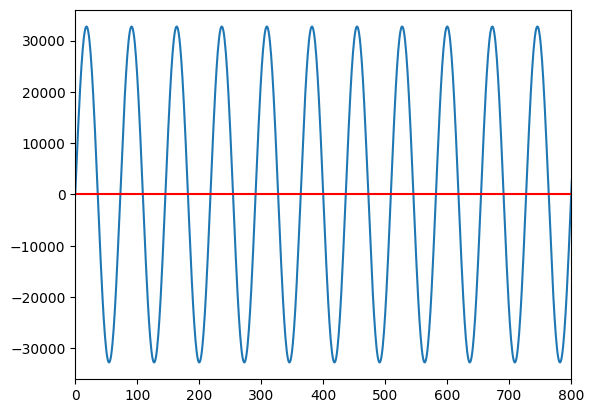

In [16]:
x = generate_wave()
plot_signal(x)

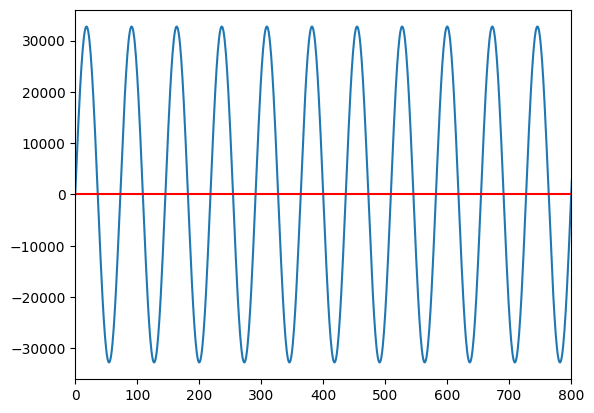

In [17]:
x = generate_wave_with_noise()
plot_signal(x)